# Анализ для интернет-магазина «Стримчик»

**Цель проекта:** 

Выявить определяющие успешность игры закономерности для того, чтобы интернет-магазин смог спланировать рекламные кампании и сделать ставку на потенциально популярный продукт.

**Исходные данные:**

Исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.

## Откроем файл с данными и изучим общую информацию:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
try:
    data = pd.read_csv('C:\datasets\games.csv')
except:
    data = pd.read_csv('/Users/khart/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк, 11 столбцов.
В столбце `Year_of_release` (год выпуска) необходимо изменить тип на datetime.

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Есть пропуски, необходимо проанализировать.
Названия столбцов начинаются с заглавной буквы - необходимо привести к нижнему регистру:

## Предобработка данных

In [5]:
data.columns = [x.lower() for x in data.columns]

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбцах `name, year_of_release, genre, critic_score, user_score, rating`.

Для начала удалим пропуски с маленьким количеством -  в столбцах `name`(2), `genre`(2), `year_of_release`(269).

In [8]:
data.dropna(subset=['name','genre', 'year_of_release'], inplace=True)

Заполним пропуски в `rating`на 'unknown', чтобы избежать потери данных по играм, у которых не проставлен возрастной ценз ESRB.

In [9]:
data['rating'] = data['rating'].fillna('unknown')

In [10]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Пропуски в столбцах `critic_score, user_score` оставим как есть, так как заполнение может привести к искажению результатов анализа, адекватной замены, к сожалению, нет.

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что в столбце `user_score` закралось значение "tbd", в таком виде не понятно, что оно значит, поэтому заменим его на не определенное значение "nan":

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype(float)

In [13]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Посчитаем суммарные продажи во всех регионах и добавим в новый столбец `common_sales`:

In [14]:
data['common_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['common_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: common_sales, dtype: float64

In [15]:
data.loc[data['common_sales'] == 'nannannannan', 'common_sales'] =float('nan')

In [16]:
data['common_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: common_sales, dtype: float64

In [17]:
data['common_sales'].astype('int')

0        82
1        40
2        35
3        32
4        31
         ..
16710     0
16711     0
16712     0
16713     0
16714     0
Name: common_sales, Length: 16444, dtype: int32

## Исследовательский анализ данных

### Узнаем, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

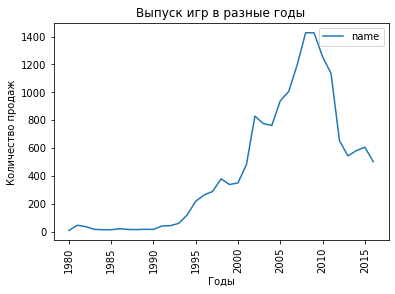

In [18]:
platform_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
platform_per_year.plot(x='year_of_release', y='name')
plt.title('Выпуск игр в разные годы')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.xticks(rotation = 90)
plt.show()

Пиковые продажи были в 2008-2009 годах. Далее идет снижение до конца имеющихся данных - до 2016 года.
До 2000го года продаж игр совсем мало, для дальнейшего анализа данные можно не учитывать.

Сохраним данные за актуальный период с 2000 года в переменной `actual_data` и будем анализировать в дальнейшем её:

In [19]:
actual_data = data[data['year_of_release'] >= 2000]
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Найдём самые продаваемые платформы за актуальный период (с 2000 года) и запишем в переменную `platforms_sales`:

In [20]:
platforms_sales = actual_data.pivot_table(index ='platform', values = 'common_sales', aggfunc = 'sum')
platforms_sales.sort_values(by = 'common_sales',ascending=False).head(10)

,common_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


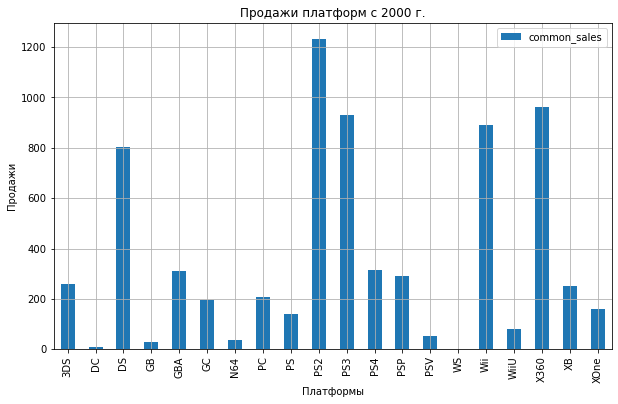

In [21]:
platforms_sales.plot(kind='bar', figsize = (10,6))
plt.grid()
plt.title('Продажи платформ с 2000 г.')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

**Топ платформ с 2000 года:**
1. PS2 - 1233.56
2. X360 - 961.24
3. PS3 - 931.34
4. Wii - 891.18
5. DS - 802.76

### Построим распределение продаж платформ по годам:

In [22]:
actual_pivot = actual_data.pivot_table(index = 'year_of_release',
                                         columns = 'platform',
                                         values = 'common_sales',
                                         aggfunc = 'sum')

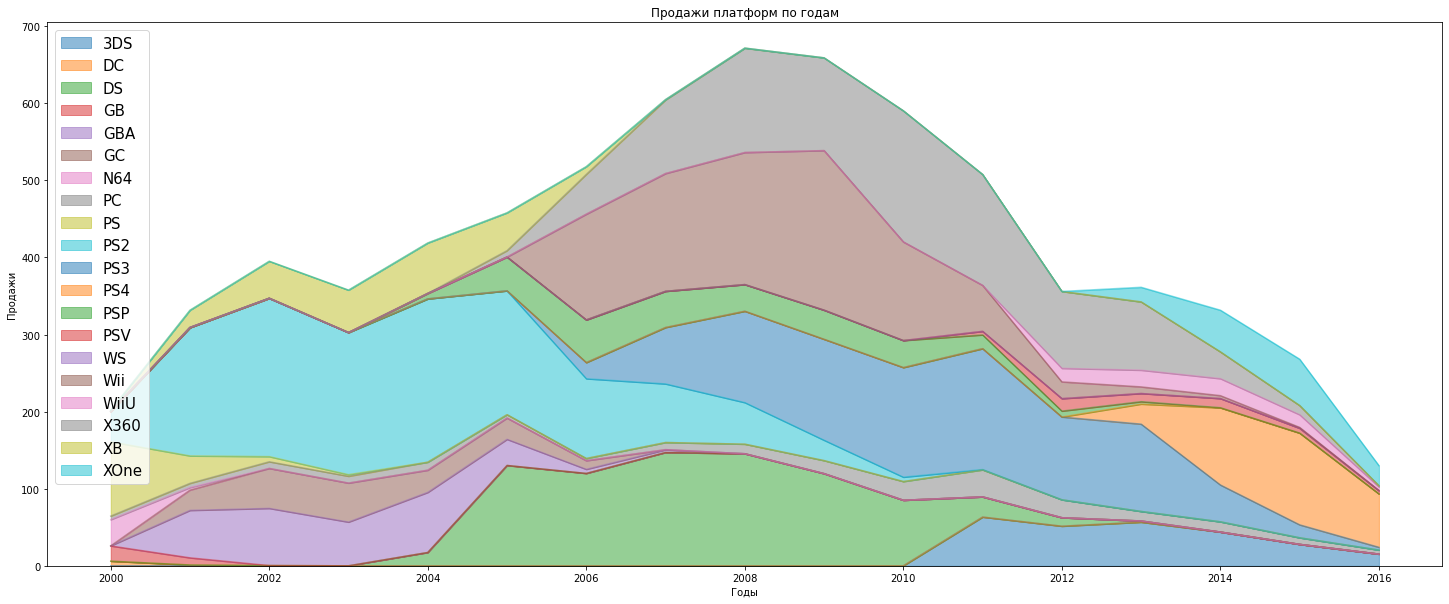

In [23]:
actual_pivot.plot.area(stacked = True, figsize = (25,10), alpha = 0.5)
plt.title('Продажи платформ по годам')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.legend(loc=2, prop={'size': 15})
plt.show()

### Найдем жизненный цикл платформы.

In [24]:
selected = actual_data.groupby(['platform']).agg({'year_of_release': 'nunique'}).rename(columns = {'year_of_release':'lifetime'})

In [25]:
selected_median = int(selected.median()[0])

In [26]:
selected_median

6

Медианное время жизни одной платформы составляет 6 лет - 3 на рост, 3 - снижение.

Значит, актуальный период на момент 2016 года - начиная с 2014, запишем срез в переменную `data_croped`:

In [27]:
data_croped = data[data['year_of_release'] >= 2014]

In [28]:
data_croped.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,common_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


### Рассмотрим, какие платформы лидируют по продажам

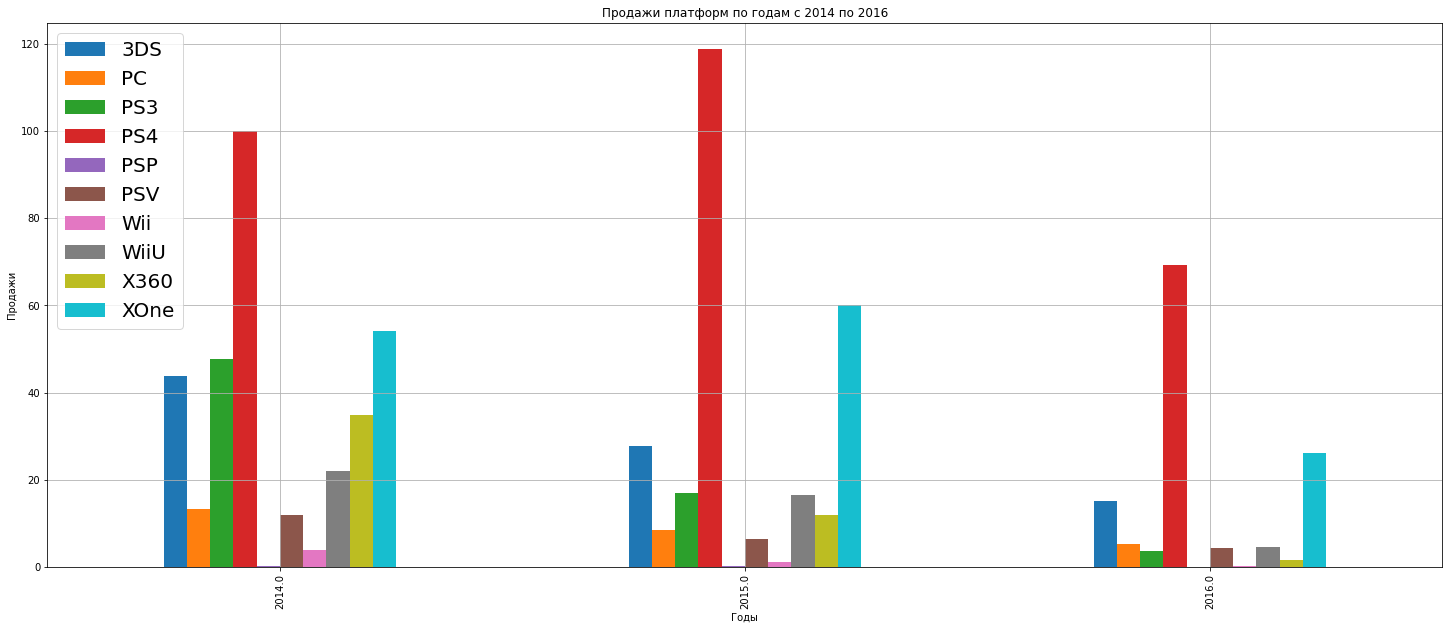

In [29]:
data_croped_pivot = data_croped.pivot_table(index = 'year_of_release', columns = 'platform', values = 'common_sales', aggfunc = 'sum')
data_croped_pivot.plot(kind='bar', figsize = (25,10))
plt.grid()
plt.title('Продажи платформ по годам с 2014 по 2016')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.legend(loc=2, prop={'size': 20})
plt.show()

Из диаграммы видно, что явным лидером в рассматриваемый актуальный период является PS4, далее идёт Xone, 3DS, X360, WiiU.

Данные за 2016 год не полные, поэтому продажи заметно меньше предыдущих годов.

### Постройм график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

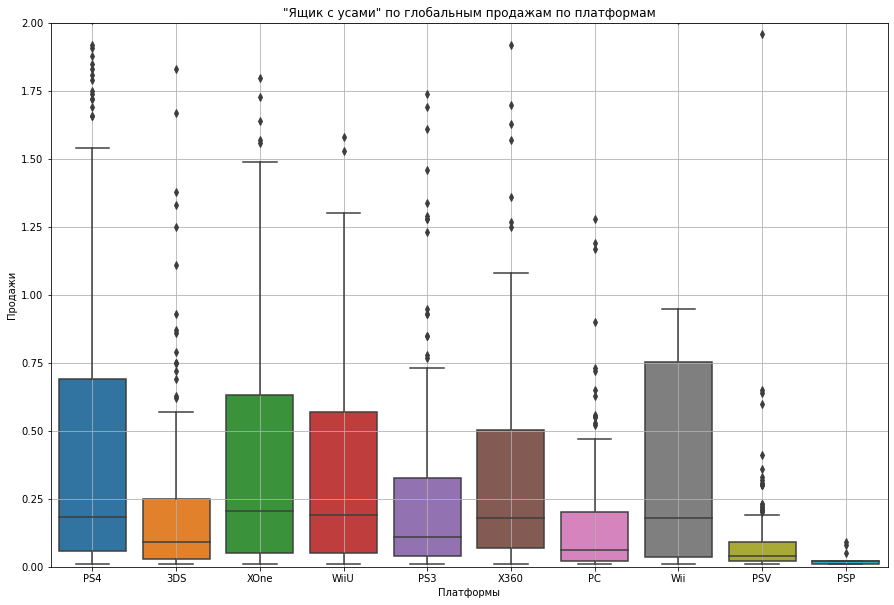

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(y='common_sales', x='platform', data=data_croped)
plt.ylim([0,2])
plt.title('"Ящик с усами" по глобальным продажам по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.grid()
plt.show()

**По данному распределению видно, что  медианные продажи высокие у Wii, PS4, XOne, WiiU, X360.**

### Построим диаграммы рассеяний и посчитайте корреляции между отзывами и продажами.

#### PS4

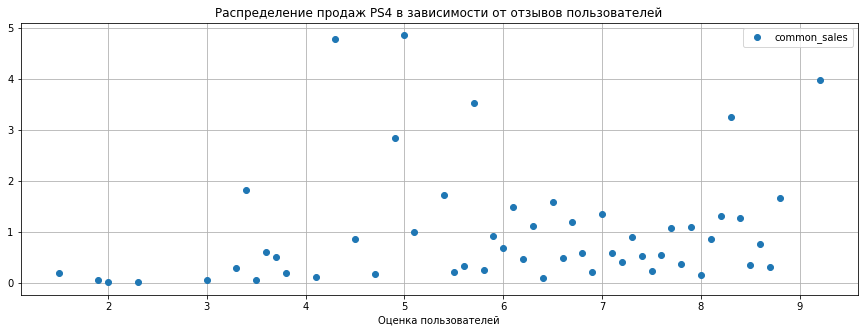

In [31]:
user_score_sales_PS4 = data_croped[data_croped['platform']=='PS4'].pivot_table(index='user_score', values=['common_sales'], aggfunc='mean')
user_score_sales_PS4.plot(style='o', grid=True, figsize=(15,5))
plt.xlabel('Оценка пользователей')
plt.title('Распределение продаж PS4 в зависимости от отзывов пользователей')
plt.show()

In [32]:
data_croped[data_croped['platform']=='PS4'].corr().loc['user_score', 'common_sales']

-0.04013158947269716

У платформы *PS4* нет зависимости продаж от оценки пользователей. Корреляция продаж PS4 и отзывов пользователей составляет -0.04.

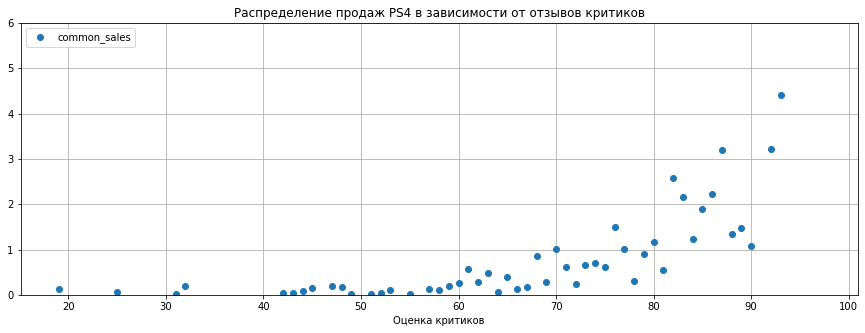

In [33]:
critic_score_sales_PS4 = data_croped[data_croped['platform']=='PS4'].pivot_table(index='critic_score', values=['common_sales'], aggfunc='mean')
critic_score_sales_PS4.plot(style='o', grid=True, figsize=(15,5))
plt.ylim([0,6])
plt.title('Распределение продаж PS4 в зависимости от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.show()

In [34]:
data_croped[data_croped['platform']=='PS4'].corr().loc['critic_score', 'common_sales']

0.40266141068104144

У платформы *PS4* слабая зависимость от оценки критиков. Корреляция продаж PS4 и отзывов критиков составляет 0.40.

#### XOne

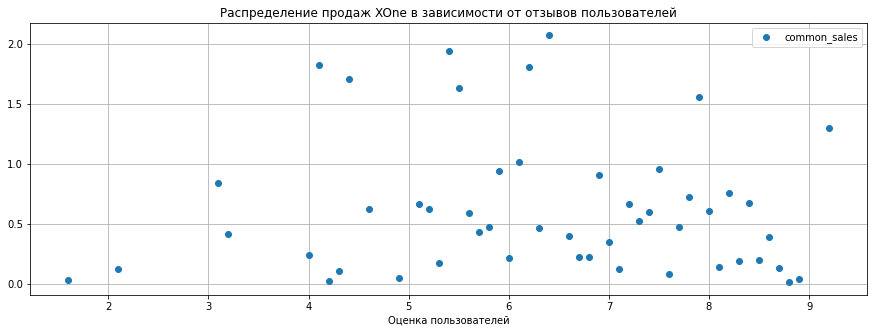

In [35]:
user_score_sales_XOne = data_croped[data_croped['platform']=='XOne'].pivot_table(index='user_score', values=['common_sales'], aggfunc='mean')
user_score_sales_XOne.plot(style='o', grid=True, figsize=(15,5))
plt.title('Распределение продаж XOne в зависимости от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.show()

In [36]:
data_croped[data_croped['platform']=='XOne'].corr().loc['user_score', 'common_sales']

-0.07038392806475892

Зависимости между продажами *XOne* и отзывами пользователей нет, коэфициент корреляции (-0,07) подтверждает это.

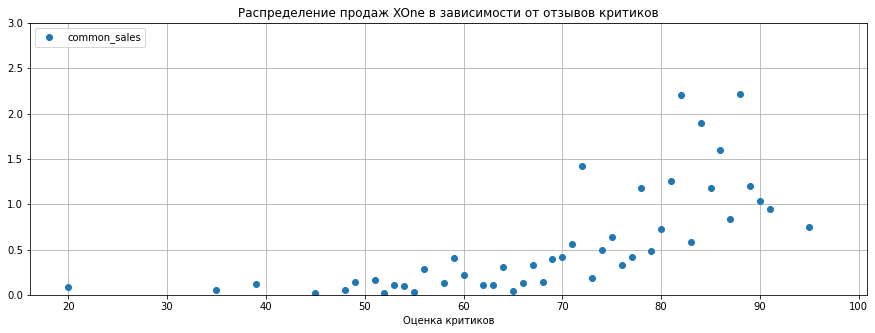

In [37]:
critic_score_sales_XOne = data_croped[data_croped['platform']=='XOne'].pivot_table(index='critic_score', values=['common_sales'], aggfunc='mean')
critic_score_sales_XOne.plot(style='o', grid=True, figsize=(15,5))
plt.ylim([0,3])
plt.title('Распределение продаж XOne в зависимости от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.show()

In [38]:
data_croped[data_croped['platform']=='XOne'].corr().loc['critic_score', 'common_sales']

0.42867694370333287

У платформы *XOne* слабая зависимость от оценки критиков. Корреляция продаж XOne и отзывов критиков составляет 0.43.

#### 3DS

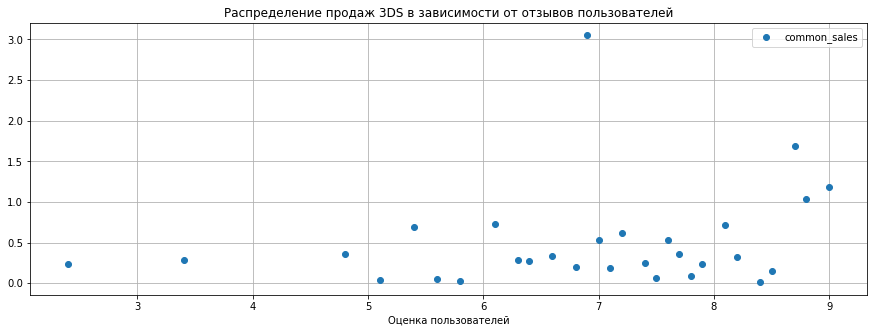

In [39]:
user_score_sales_3DS = data_croped[data_croped['platform']=='3DS'].pivot_table(index='user_score', values=['common_sales'], aggfunc='mean')
user_score_sales_3DS.plot(style='o', grid=True, figsize=(15,5))
plt.title('Распределение продаж 3DS в зависимости от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.show()

In [40]:
data_croped[data_croped['platform']=='3DS'].corr().loc['user_score', 'common_sales']

0.21519327185270265

Зависимости между продажами *3DS* и отзывами пользователей нет, коэфициент корреляции (0.21) подтверждает это.

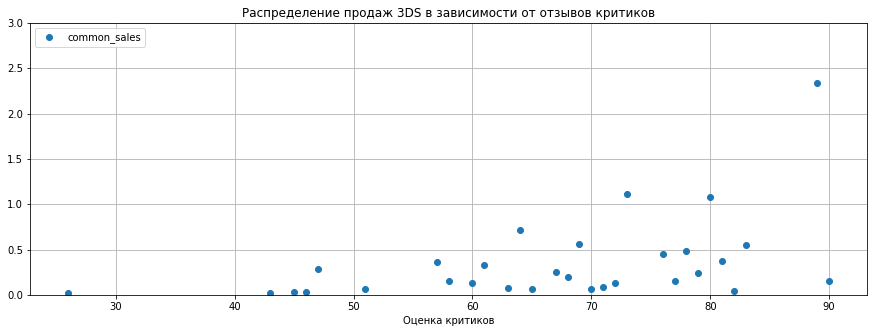

In [41]:
critic_score_sales_3DS = data_croped[data_croped['platform']=='3DS'].pivot_table(index='critic_score', values=['common_sales'], aggfunc='mean')
critic_score_sales_3DS.plot(style='o', grid=True, figsize=(15,5))
plt.ylim([0,3])
plt.title('Распределение продаж 3DS в зависимости от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.show()

In [42]:
data_croped[data_croped['platform']=='3DS'].corr().loc['critic_score', 'common_sales']

0.31411749286905155

Зависимости между продажами *3DS* и отзывами критиков нет, коэфициент корреляции (0.31) подтверждает это.

#### X360

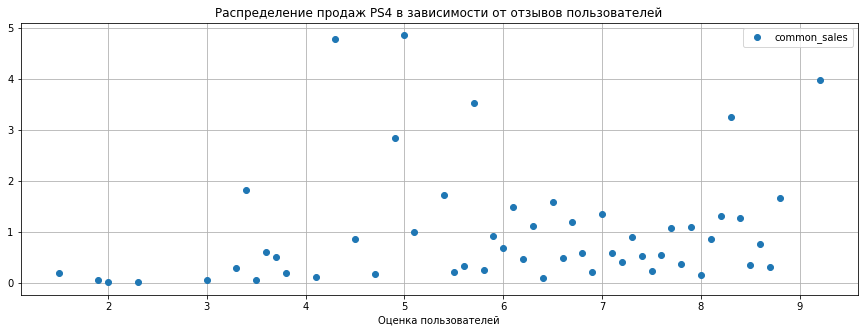

In [43]:
user_score_sales_PS4 = data_croped[data_croped['platform']=='PS4'].pivot_table(index='user_score', values=['common_sales'], aggfunc='mean')
user_score_sales_PS4.plot(style='o', grid=True, figsize=(15,5))
plt.title('Распределение продаж PS4 в зависимости от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.show()

In [44]:
data_croped[data_croped['platform']=='XOne'].corr().loc['user_score', 'common_sales']

-0.07038392806475892

Зависимости между отзывами пользователей и продажами *X360* нет, коэффициент корреляции (-0,07).

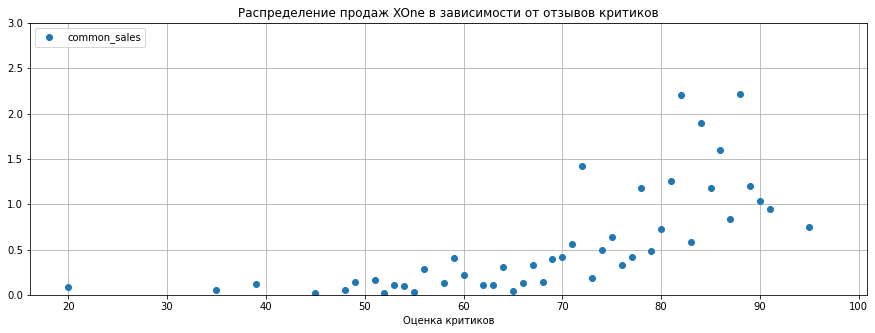

In [45]:
critic_score_sales_XOne = data_croped[data_croped['platform']=='XOne'].pivot_table(index='critic_score', values=['common_sales'], aggfunc='mean')
critic_score_sales_XOne.plot(style='o', grid=True, figsize=(15,5))
plt.ylim([0,3])
plt.title('Распределение продаж XOne в зависимости от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.show()

In [46]:
data_croped[data_croped['platform']=='XOne'].corr().loc['critic_score', 'common_sales']

0.42867694370333287

Слабая зависимость от оценки критиков. Корреляция продаж *XOne* и отзывов критиков составляет 0.43.

#### WiiU

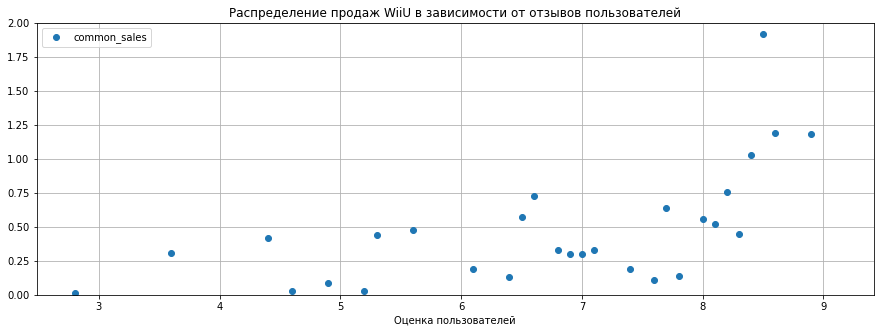

In [47]:
user_score_sales_WiiU = data_croped[data_croped['platform']=='WiiU'].pivot_table(index='user_score', values=['common_sales'], aggfunc='mean')
user_score_sales_WiiU.plot(style='o', grid=True, figsize=(15,5))
plt.ylim([0,2])
plt.title('Распределение продаж WiiU в зависимости от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.show()

In [48]:
data_croped[data_croped['platform']=='WiiU'].corr().loc['user_score', 'common_sales']

0.4079264579217078

Продажи *WiiU* немного зависят от отзывов пользователей, слабая корреляция 0,4.

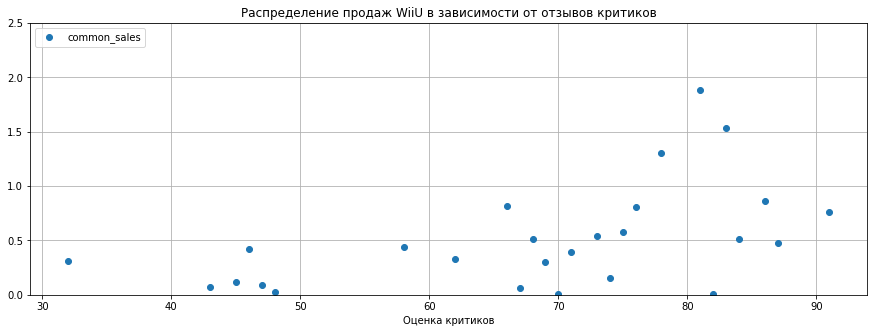

In [49]:
critic_score_sales_WiiU = data_croped[data_croped['platform']=='WiiU'].pivot_table(index='critic_score', values=['common_sales'], aggfunc='mean')
critic_score_sales_WiiU.plot(style='o', grid=True, figsize=(15,5))
plt.ylim([0,2.5])
plt.title('Распределение продаж WiiU в зависимости от отзывов критиков')
plt.xlabel('Оценка критиков')
plt.show()

In [50]:
data_croped[data_croped['platform']=='WiiU'].corr().loc['critic_score', 'common_sales']

0.3702014124808842

Продажи *WiiU* не зависят от отзывов пользователей, корреляция 0,37.

### Рассмотрим общее распределение продаж по жанрам:

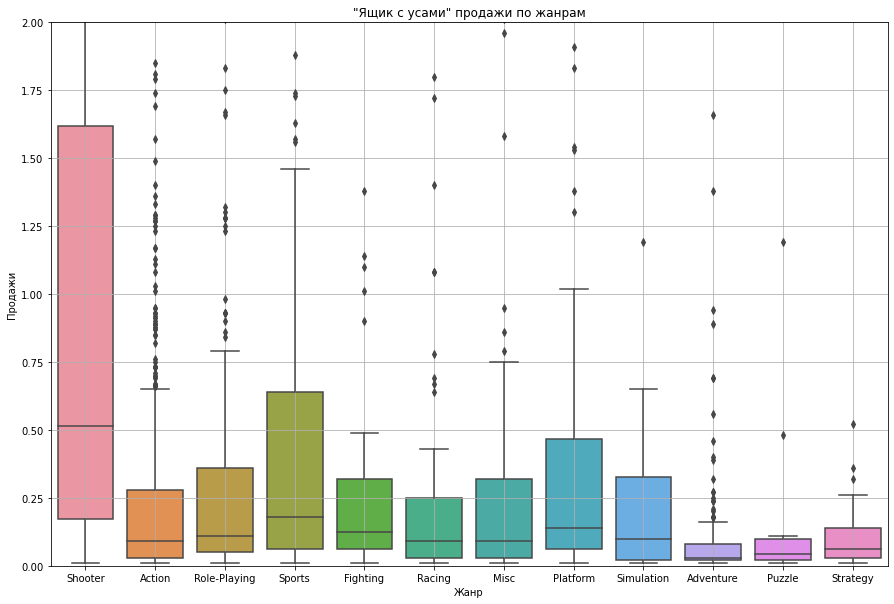

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(y='common_sales', x='genre', data=data_croped)
plt.ylim([0,2])
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('"Ящик с усами" продажи по жанрам')
plt.grid()
plt.show()

Самый продаваемый жанр - *Shooter*. Самые низкие продажи у жанра *Adventure*.

## Составим портрет пользователя каждого региона

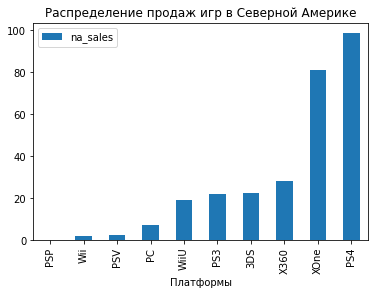

In [52]:
data_croped.groupby(['platform']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=True).plot(kind='bar')
plt.title('Распределение продаж игр в Северной Америке')
plt.xlabel('Платформы')
plt.show()

В Северной Америке в основном покупают PS4, далее идёт XОne, доля остальных игр значительно меньше.

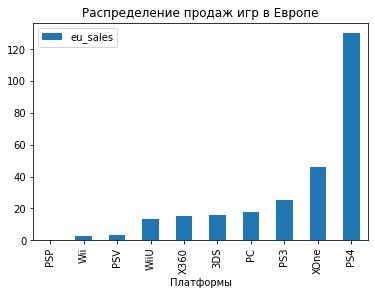

In [53]:
data_croped.groupby(['platform']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=True).plot(kind='bar')
plt.title('Распределение продаж игр в Европе')
plt.xlabel('Платформы')
plt.show()

В Европе картина по продажам игр похожа на Северную Америку, но надо отметить, что PS4 значительнее лидирует перед XОne. Доля XОne практически в 2 раза ниже, чем в Америке.  

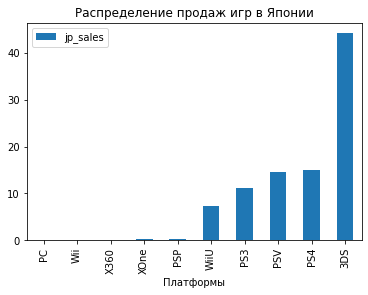

In [54]:
data_croped.groupby(['platform']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=True).plot(kind='bar')
plt.title('Распределение продаж игр в Японии')
plt.xlabel('Платформы')
plt.show()

В Японии абсолютно другая картина - доля 3DS превышает все остальные более чем в 2 раза.

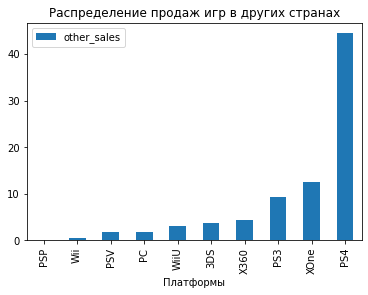

In [55]:
data_croped.groupby(['platform']).agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=True).plot(kind='bar')
plt.title('Распределение продаж игр в других странах')
plt.xlabel('Платформы')
plt.show()

В стальных странах лидирующее положение занимает PS4. Далее идет XOne с уровенем продаж практически в 2.5 раза меньше PS4.

По играм в Японии лидирует доля 3DS, в остальных странах картина примерно одинаковая - лидирует PS4, далее идёт XOne.
Рынок Японии очень специфичен и отличается от трендов в других странах, это следует иметь ввиду при планировании.

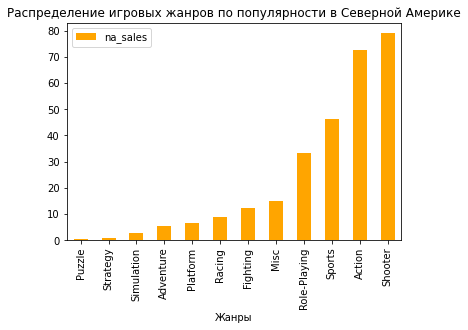

In [56]:
data_croped.groupby(['genre']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=True).plot(kind='bar', color = 'orange')
plt.title('Распределение игровых жанров по популярности в Северной Америке')
plt.xlabel('Жанры')
plt.show()

Самый популярный жанр в Северной Америке - Shooter, далее с небольшим отрывом идёт Action, на третьем месте - Sports.

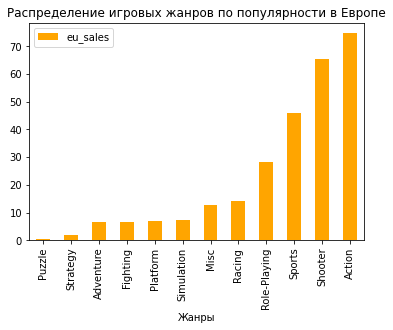

In [57]:
data_croped.groupby(['genre']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=True).plot(kind='bar', color = 'orange')
plt.title('Распределение игровых жанров по популярности в Европе')
plt.xlabel('Жанры')
plt.show()

В Европе лидирует Action, далее немного отстаёт Shooter на третьем месте - Sports.

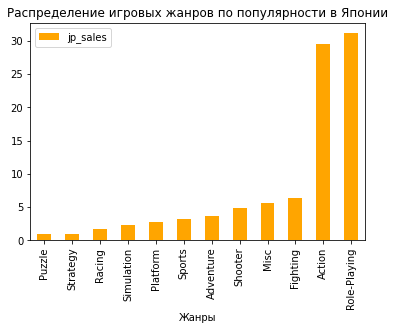

In [58]:
data_croped.groupby(['genre']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=True).plot(kind='bar', color = 'orange')
plt.title('Распределение игровых жанров по популярности в Японии')
plt.xlabel('Жанры')
plt.show()

В Японии на первом месте жанр Role-Playing, практически наравне с ним Action. Остальные жанры сильно отстают.

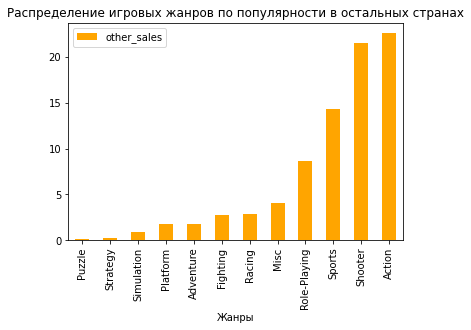

In [59]:
data_croped.groupby(['genre']).agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=True).plot(kind='bar', color = 'orange')
plt.title('Распределение игровых жанров по популярности в остальных странах')
plt.xlabel('Жанры')
plt.show()

В остальных странах ситуация как в Европе -  лидирует Action, далее Shooter с небольшим отрывом, на третьем месте - Sports.

Популярность жанров по регионам снова показывает, что Япония выделяется на общем фоне, в Японии самый популярный жанр - Role-Playing, далее идёт Action. В остальных странах на первом и втором месте с небольшим отрывом друг от друга - Shooter и Action.
Тут снова выделяется специфика Японии, как обособленной страны.

In [60]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**Влияние рейтинга ESRB на продажи:**

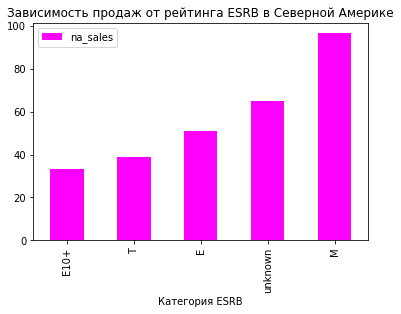

In [61]:
data_croped.groupby(['rating']).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=True).plot(kind='bar', color = 'magenta')
plt.title('Зависимость продаж от рейтинга ESRB в Северной Америке')
plt.xlabel('Категория ESRB')
plt.show()

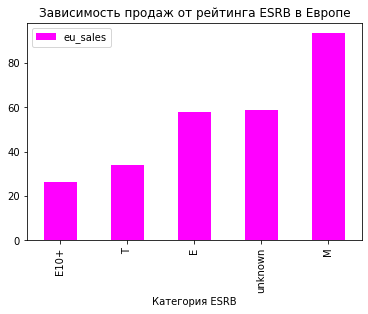

In [62]:
data_croped.groupby(['rating']).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=True).plot(kind='bar', color = 'magenta')
plt.title('Зависимость продаж от рейтинга ESRB в Европе')
plt.xlabel('Категория ESRB')
plt.show()

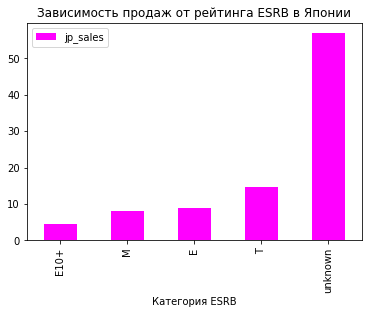

In [63]:
data_croped.groupby(['rating']).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=True).plot(kind='bar', color = 'magenta')
plt.title('Зависимость продаж от рейтинга ESRB в Японии')
plt.xlabel('Категория ESRB')
plt.show()

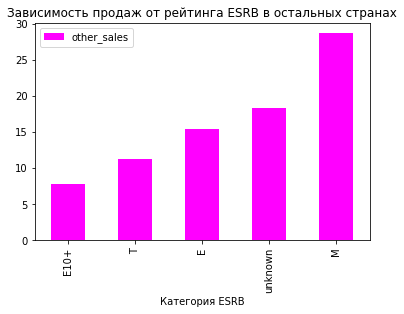

In [64]:
data_croped.groupby(['rating']).agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=True).plot(kind='bar', color = 'magenta')
plt.title('Зависимость продаж от рейтинга ESRB в остальных странах')
plt.xlabel('Категория ESRB')
plt.show()

Заметна высокая зависимость продаж от категорий рейтинга ESRB.

Рейтинг ESRB - система категоризации игр по допустимому возрасту игроков.
В Японии на первом месте продажи игр без категоризации ESRB. Возможно, данная система категоризации игр не принята Японией, как обязательная.
Во всех остальных регионах лидируют продажи игр категории "М" - для взрослых. Далее идут игры без категорий.

**Портрет пользователя каждого региона:**

* Американский и Европейский пользователи, а также пользователи остальных стран примерно одинаковые - взрослые, играют в PS4, XОne, X360 предпочитают жанры Shooter и Action.

* Японский пользователь является самым специфичным из всех, это пользователь, который предпочитает 3DS, из жанров любит Role-Playing.

## Проверка гипотез

###  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Нулевая гипотеза:** средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
**Альтернативная гипотеза:** средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Для проверки гипотезы выбираем ttest_ind так как необходимо проверить гипотезу о равенстве средних двух совокупностей по взятым из них выборкам.

In [65]:
xboxone = data_croped[data_croped['platform'] == 'XOne']
xboxone = xboxone[~(xboxone['user_score'].isna())]

pc = data_croped[data_croped['platform'] == 'PC']
pc = pc[~(pc['user_score'].isna())]

alpha = 0.05
results = st.ttest_ind(
    xboxone['user_score'],
    pc['user_score'])
print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Cредний пользовательский рейтинг платформы Xbox One НЕ равен среднему пользовательскому рейтингу платформы PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотезы выбираем ttest_ind так как необходимо проверить гипотезу о равенстве средних двух совокупностей по взятым из них выборкам.

**Нулевая гипотеза:** средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

**Альтернативная гипотеза:** средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

In [66]:
action = data_croped[data_croped['genre'] == 'Action']
action = action[~(action['user_score'].isna())]

sports = data_croped[data_croped['genre'] == 'Sports']
sports = sports[~(sports['user_score'].isna())]

alpha = 0.05
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'])
print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

**Общий вывод:**

Были проанализированы данные для интернет-магазина "Стримчик".
Была выполнена предобработка данных, исследованы зависимости цены от различных факторов.

В ходе исследования были выявлены следующие закономерности и рекомендации для планирования рекламных кампаний:

* Игры начинают активно продаваться с 2000 года. Пиковые продажи компьютерных игр были в 2008-2009 годах. Далее идет снижение продаж. Возможно интерес к играм у пльзователей угасает.
* Наиболее высокие продажи у платформ PS4, XOne, 3DS, X360, WiiU, на них следует обратить внимание.

* Самый продаваемый жанр - Shooter. Самые низкие продажи у жанра Adventure.
* В Японии лидирует доля 3DS, в остальных странах картина примерно одинаковая - лидирует PS4, далее идёт XOne.
* Рынок Японии очень специфичен и отличается от трендов в других странах, это следует иметь ввиду при планировании.
* Популярность жанров по регионам показывает, что Япония выделяется на общем фоне, в Японии самый популярный жанр - Role-Playing, далее идёт Action. В остальных странах на первом и втором месте с небольшим отрывом друг от друга - Shooter и Action. Тут снова выделяется специфика Японии, как обособленной страны.
* Заметна высокая зависимость продаж от категорий рейтинга ESRB. Рейтинг ESRB - система категоризации игр по допустимому возрасту игроков. В Японии на первом месте продажи игр без категоризации ESRB. Возможно, данная система категоризации игр не принята Японией, как обязательная. Во всех остальных регионах лидируют продажи игр категории "М" - для взрослых. Далее идут игры без категорий.

*Портрет пользователя каждого региона:*

*Американский и Европейский пользователи, а также пользователи остальных стран* примерно одинаковые - взрослые, играют в PS4, XОne, X360 предпочитают жанры Shooter и Action.

*Японский пользователь* является самым специфичным из всех, это пользователь, который предпочитает 3DS, из жанров любит Role-Playing.

* Cредний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
* Средний пользовательский рейтинг жанра Action НЕ равен среднему пользовательскому рейтингу жанра Sports.
